## ニューラルネットワーク入門

非線形関数は`[-∞,+∞] -> [-1,+1]`に変換する

In [31]:
import math

In [32]:
math.tanh(-2.2) # ゴミ収集車

-0.9757431300314515

In [33]:
math.tanh(0.1) # 熊

0.09966799462495582

In [34]:
math.tanh(2.5) # 犬

0.9866142981514303

### PytorchのNNモジュール

In [35]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [36]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [37]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 0,  3,  2,  7,  9,  4, 10,  1,  5]), tensor([6, 8]))

In [38]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [39]:
import torch.nn as nn

In [40]:
linear_model = nn.Linear(1, 1) # コンストラクタ引数
linear_model(t_un_val)

tensor([[0.2314],
        [0.7179]], grad_fn=<AddmmBackward0>)

In [41]:
linear_model.weight

Parameter containing:
tensor([[0.3355]], requires_grad=True)

In [42]:
linear_model.bias

Parameter containing:
tensor([-0.9062], requires_grad=True)

In [43]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.5706],
        [-0.5706],
        [-0.5706],
        [-0.5706],
        [-0.5706],
        [-0.5706],
        [-0.5706],
        [-0.5706],
        [-0.5706],
        [-0.5706]], grad_fn=<AddmmBackward0>)

In [44]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [45]:
linear_model.parameters()

<generator object Module.parameters at 0x000001D5E64124A0>

In [46]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.2337]], requires_grad=True),
 Parameter containing:
 tensor([-0.9794], requires_grad=True)]

In [47]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [48]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 194.5922, Validation loss 14.1959
Epoch 1000, Training loss 3.3512, Validation loss 5.7915
Epoch 2000, Training loss 2.2919, Validation loss 5.8695
Epoch 3000, Training loss 2.2531, Validation loss 6.0909

Parameter containing:
tensor([[5.4568]], requires_grad=True)
Parameter containing:
tensor([-17.7134], requires_grad=True)


nn.MSELoss (最小二乗目的関数) def loss_fn()と同じ

In [49]:
training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), #loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 2.2531, Validation loss 6.0910
Epoch 1000, Training loss 2.2516, Validation loss 6.1409
Epoch 2000, Training loss 2.2516, Validation loss 6.1507
Epoch 3000, Training loss 2.2516, Validation loss 6.1526

Parameter containing:
tensor([[5.4789]], requires_grad=True)
Parameter containing:
tensor([-17.8442], requires_grad=True)


### 線形モデル(華氏から摂氏への変換モデル)をNNに置き換える

In [54]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1> [in,out] = [1,13]
            nn.Tanh(), # [in,out] = [13,13]
            nn.Linear(13, 1)) # <2> [in,out] = [13,1]
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [55]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

### パラメータを名前付きで調査すると便利
named_parameters()を使う

In [57]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


nn.Sequential()は, collections.OrderedDictも受け付ける

In [58]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [59]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


### 属性変数の呼び出しにより特定のモデルパラメータをモニタリングできる

In [60]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.2099], requires_grad=True)

In [61]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad) # ~.weight.gradが属性変数

Epoch 1, Training loss 218.1253, Validation loss 20.7525
Epoch 1000, Training loss 14.2378, Validation loss 18.0623
Epoch 2000, Training loss 5.3552, Validation loss 8.1090
Epoch 3000, Training loss 2.6025, Validation loss 5.8183
Epoch 4000, Training loss 1.5598, Validation loss 5.1934
Epoch 5000, Training loss 1.4084, Validation loss 5.2386
output tensor([[0.1097],
        [7.4573]], grad_fn=<AddmmBackward0>)
answer tensor([[3.],
        [6.]])
hidden tensor([[-0.0046],
        [-0.0387],
        [ 0.0002],
        [ 0.0042],
        [ 0.0272],
        [ 0.0045],
        [ 0.0122],
        [-0.0205]])


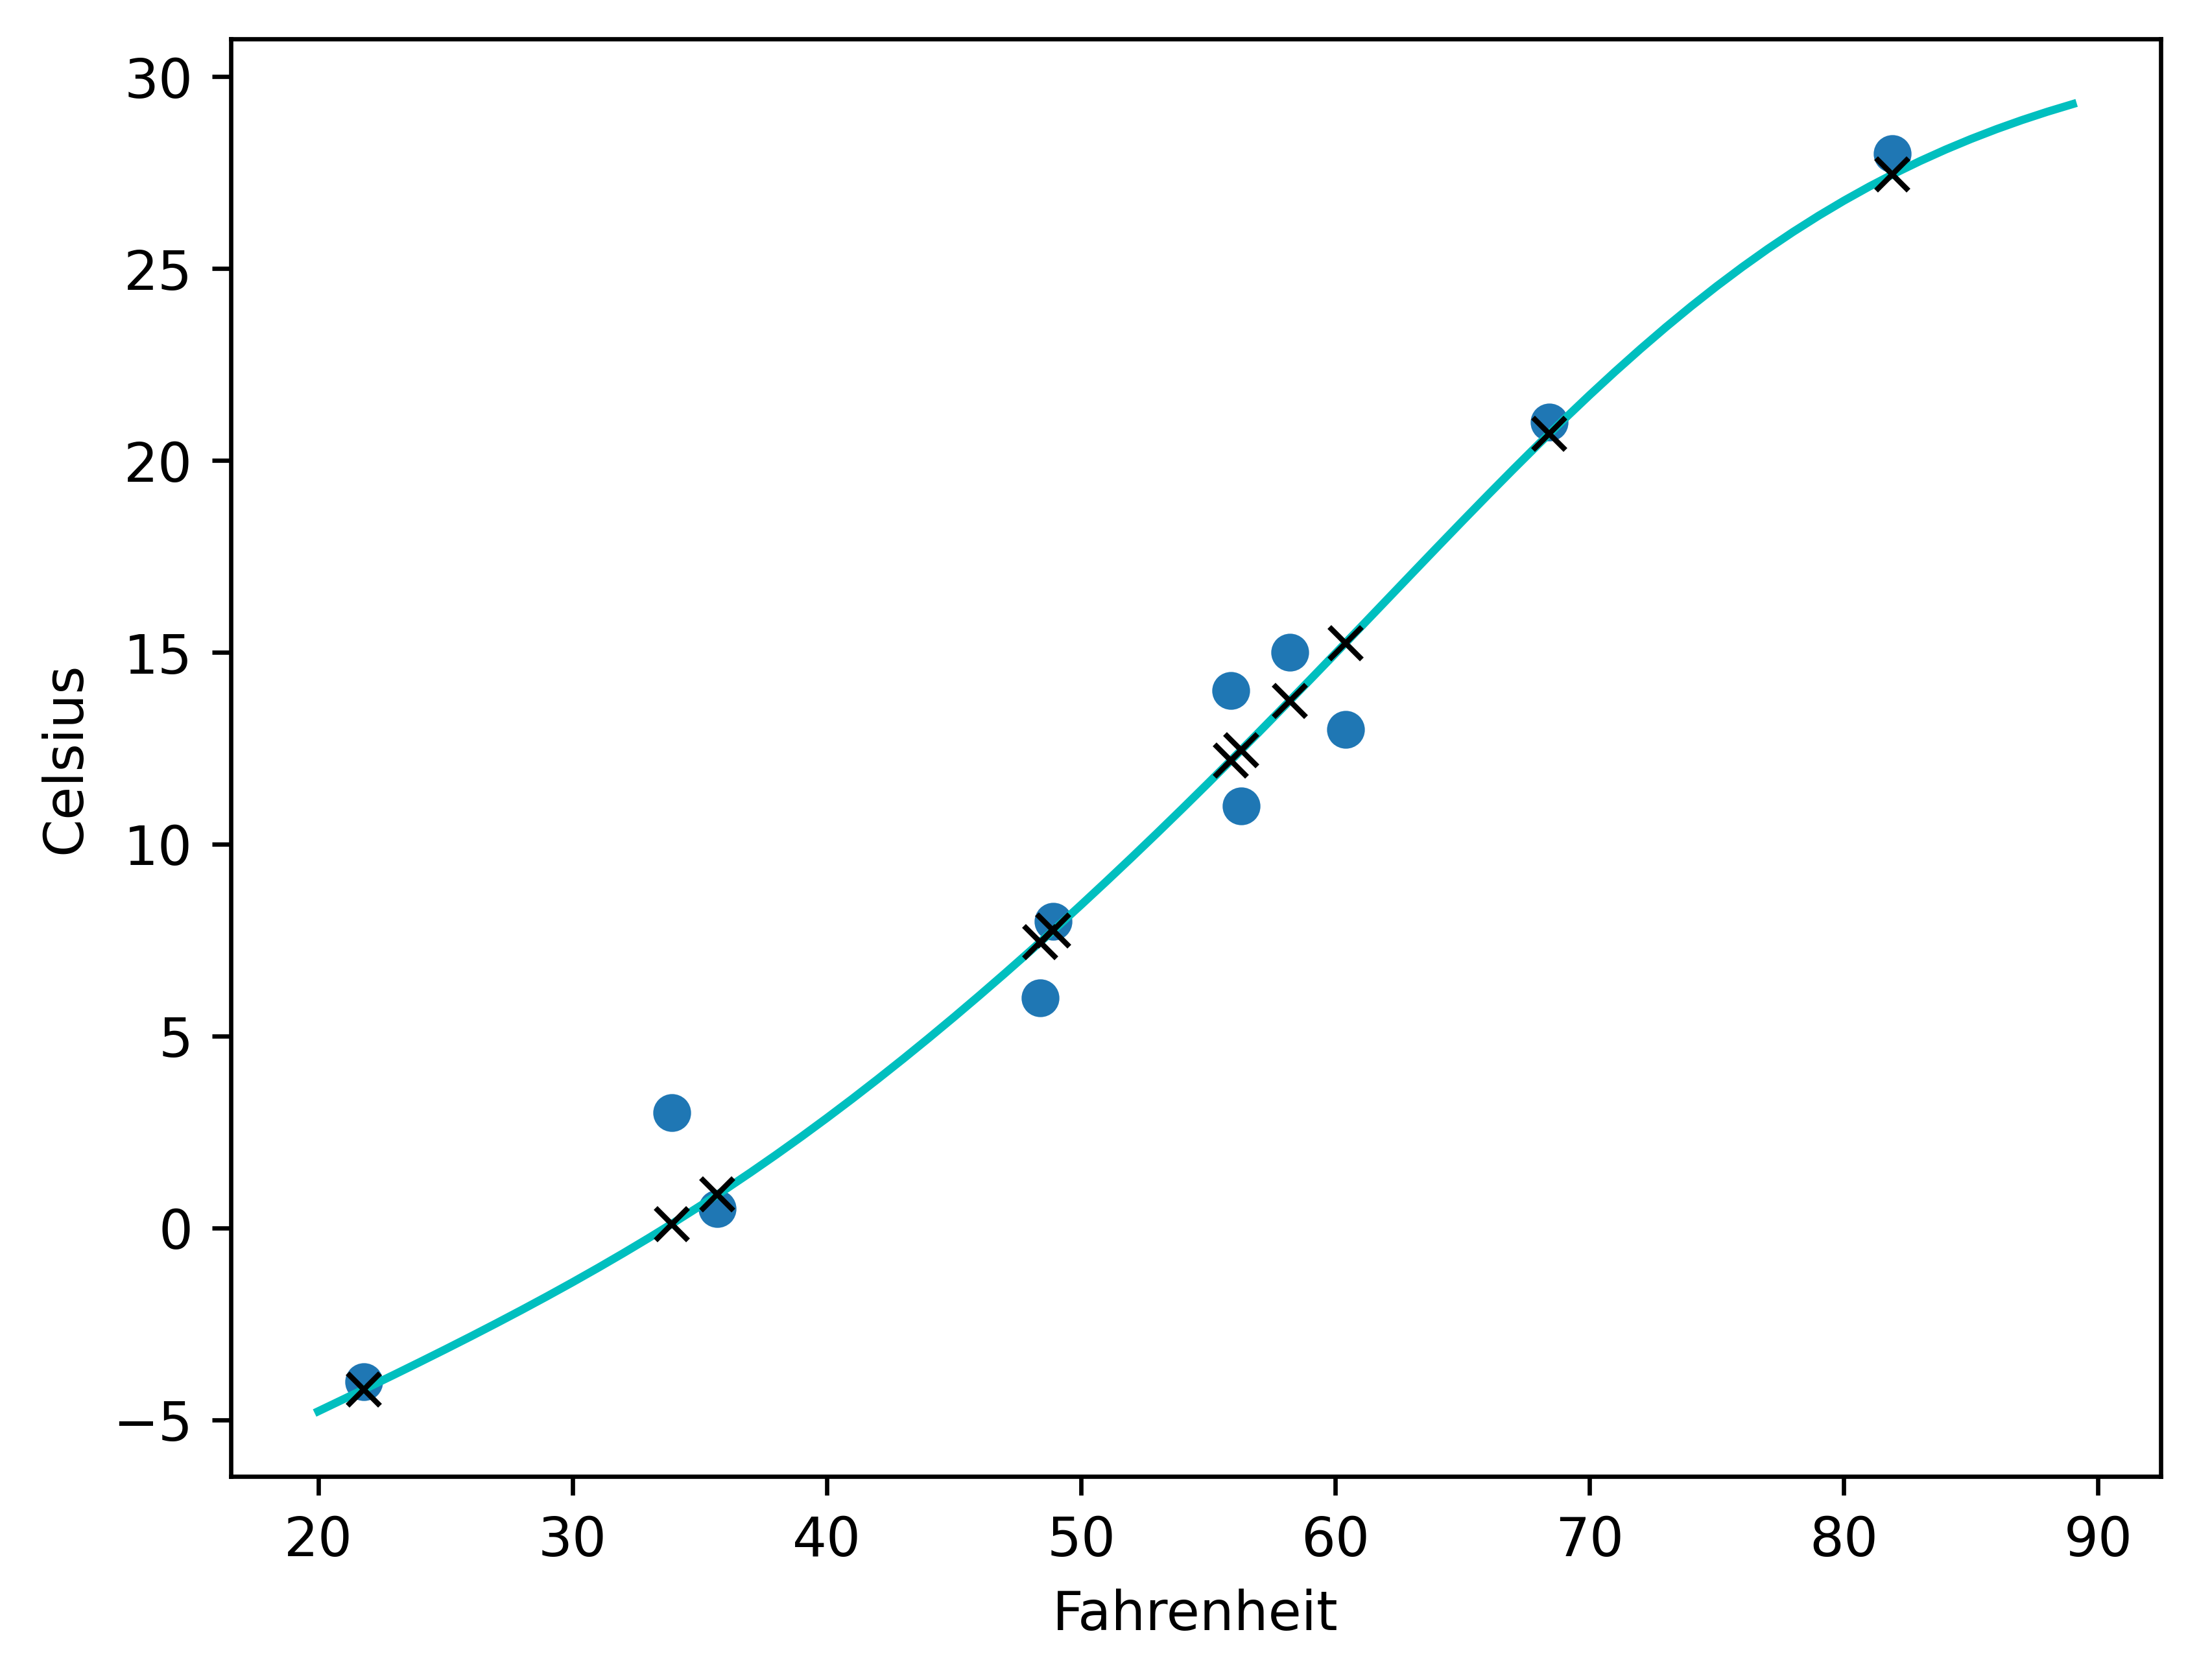

In [62]:
# NNモデルの適合を可視化
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Epoch 1, Training loss 219.9434, Validation loss 20.7916
Epoch 1000, Training loss 61.3529, Validation loss 39.4737
Epoch 2000, Training loss 38.3452, Validation loss 24.1294
Epoch 3000, Training loss 22.9384, Validation loss 14.5942
Epoch 4000, Training loss 12.9942, Validation loss 8.5453
Epoch 5000, Training loss 7.7702, Validation loss 6.4199


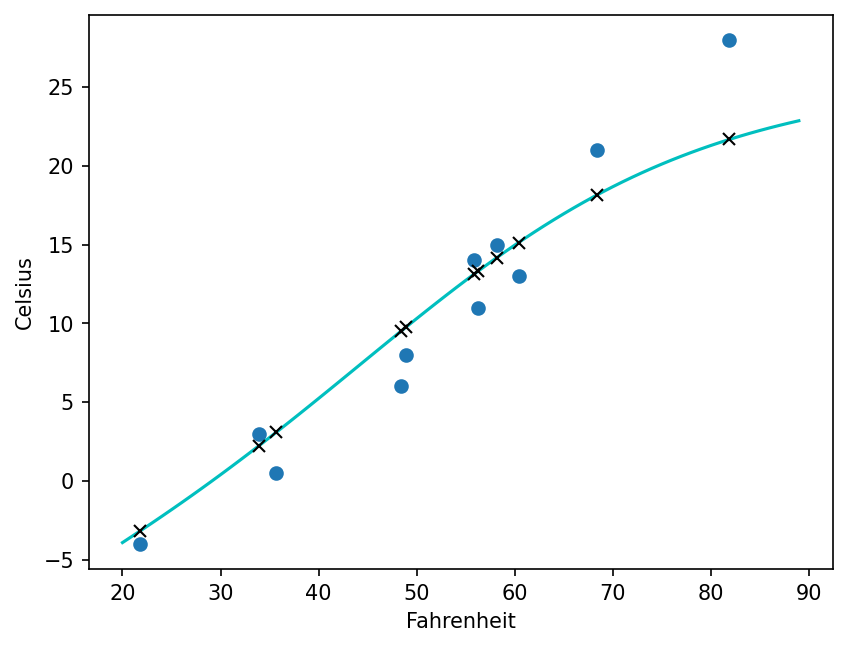

In [63]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')